In [1]:
!python --version

Python 3.12.4


In [3]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk(r"C:\Users\HP\Downloads\archive (5)"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\HP\Downloads\archive (5)\test_zip\test\apple_77.jpg
C:\Users\HP\Downloads\archive (5)\test_zip\test\apple_77.xml
C:\Users\HP\Downloads\archive (5)\test_zip\test\apple_78.jpg
C:\Users\HP\Downloads\archive (5)\test_zip\test\apple_78.xml
C:\Users\HP\Downloads\archive (5)\test_zip\test\apple_79.jpg
C:\Users\HP\Downloads\archive (5)\test_zip\test\apple_79.xml
C:\Users\HP\Downloads\archive (5)\test_zip\test\apple_80.jpg
C:\Users\HP\Downloads\archive (5)\test_zip\test\apple_80.xml
C:\Users\HP\Downloads\archive (5)\test_zip\test\apple_81.jpg
C:\Users\HP\Downloads\archive (5)\test_zip\test\apple_81.xml
C:\Users\HP\Downloads\archive (5)\test_zip\test\apple_82.jpg
C:\Users\HP\Downloads\archive (5)\test_zip\test\apple_82.xml
C:\Users\HP\Downloads\archive (5)\test_zip\test\apple_83.jpg
C:\Users\HP\Downloads\archive (5)\test_zip\test\apple_83.xml
C:\Users\HP\Downloads\archive (5)\test_zip\test\apple_84.jpg
C:\Users\HP\Downloads\archive (5)\test_zip\test\apple_84.xml
C:\Users\HP\Downloads\ar

In [4]:
import matplotlib.pyplot as plt #for plotting images 

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

import cv2
from sklearn import preprocessing
from pathlib import Path

In [5]:
labels_train = []
labels_test = []

path_train = []
path_test = []

In [7]:
train_path = r"C:\Users\HP\Downloads\archive (5)\train_zip\train"
test_path = r"C:\Users\HP\Downloads\archive (5)\test_zip\test"

In [8]:
for filename in os.listdir(train_path):
    if(filename.split('.')[1]=="jpg"):
        labels_train.append(filename.split('_')[0])
        path_train.append(os.path.join(train_path, filename)) 

for filename in os.listdir(test_path):
    if(filename.split('.')[1]=="jpg"):
        labels_test.append(filename.split('_')[0])
        path_test.append(os.path.join(test_path, filename))

In [9]:
labels_test

['apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'banana',
 'mixed',
 'mixed',
 'mixed',
 'mixed',
 'mixed',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange']

In [10]:
label_train_unique = np.unique(np.array(labels_train))
label_test_unique = np.unique(np.array(labels_test))

In [11]:
print("Unique labels for train are: ", label_train_unique)
print("Number of jpg images in train are: ", len(path_train))

print("\nUnique labels are for test are: ", label_test_unique)
print("Number of jpg images for train are: ", len(path_test))

Unique labels for train are:  ['apple' 'banana' 'mixed' 'orange']
Number of jpg images in train are:  240

Unique labels are for test are:  ['apple' 'banana' 'mixed' 'orange']
Number of jpg images for train are:  60


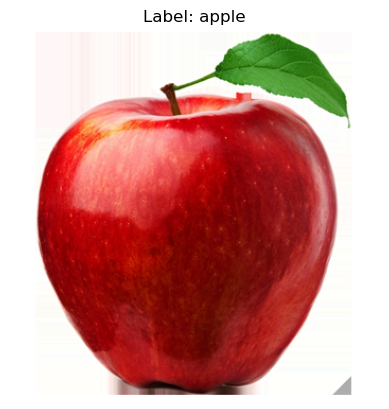

In [13]:
image = cv2.imread(path_train[0])
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(rgb_img)
plt.title("Label: " + labels_train[0])
plt.axis('off')
plt.show()

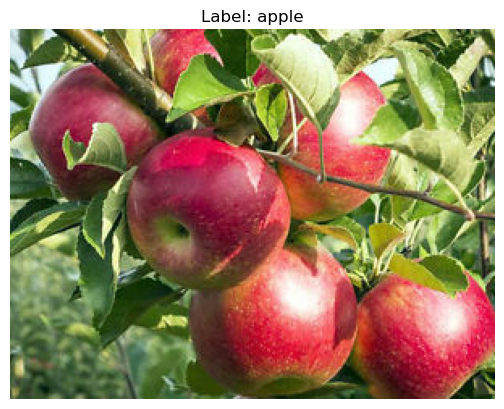

In [14]:
image = cv2.imread(path_test[0])

rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

plt.imshow(rgb_img)
plt.title("Label: " + labels_test[0])
plt.axis('off')
plt.show()

In [15]:
X_train = []

for path in path_train:
    img = cv2.imread(path)    
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    final_img =  cv2.resize(rgb_img, (50,50))
    X_train.append(final_img)
    
X_train = np.array(X_train)

In [16]:
X_train.shape

(240, 50, 50, 3)

In [17]:
X_test = []

for path in path_test:
    img = cv2.imread(path)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    final_img = cv2.resize(rgb_img, (50,50))
    X_test.append(final_img)
    
X_test = np.array(X_test)

In [18]:
fruits = {}

for i in range(len(label_train_unique)):
    fruits[label_train_unique[i]] = i
    
fruits

{'apple': 0, 'banana': 1, 'mixed': 2, 'orange': 3}

In [19]:
temp_train = []
temp_test = []


for label in labels_train:
    temp_train.append(fruits.get(label))

for label in labels_test:
    temp_test.append(fruits.get(label))

print("Length of train data: ", len(temp_train))
print("Length of test data: ", len(temp_test))

Length of train data:  240
Length of test data:  60


In [20]:
import tensorflow

In [21]:
y_train = tensorflow.keras.utils.to_categorical(temp_train, 4)
y_test = tensorflow.keras.utils.to_categorical(temp_test, 4)

Length of X_train:  240


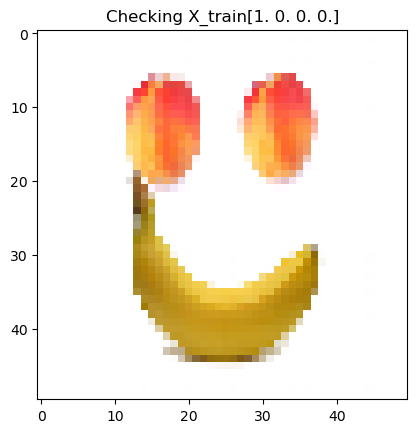

In [26]:
print("Length of X_train: ", len(X_train))
plt.imshow(X_train[100])
plt.title("Checking X_train"+str(y_train[58]))
plt.show()

In [27]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [28]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [29]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

print("\ny_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (240, 50, 50, 3)
X_test shape:  (60, 50, 50, 3)

y_train shape:  (240, 4)
y_test shape:  (60, 4)


In [30]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (50, 50, 3), padding = 'same', activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding = 'same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation = 'softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 50, 50, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 22, 22, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,982,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,049,316 (7.82 MB)

 Trainable params: 2,049,316 (7.82 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_split = 0.2, shuffle = True)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 278ms/step - accuracy: 0.3219 - loss: 1.3946 - val_accuracy: 0.0000e+00 - val_loss: 1.4712
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.4544 - loss: 1.2250 - val_accuracy: 0.0000e+00 - val_loss: 1.6446
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.6856 - loss: 0.9916 - val_accuracy: 0.0000e+00 - val_loss: 2.2330
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.7876 - loss: 0.7344 - val_accuracy: 0.0000e+00 - val_loss: 1.7809
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.7473 - loss: 0.6916 - val_accuracy: 0.0208 - val_loss: 1.7971
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.7929 - loss: 0.6289 - val_accuracy: 0.0833 - val_loss: 1.6403
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 0.8194 - loss: 0.5426 - val_accuracy: 0.0208 - val_loss: 2.1126
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.8208 - loss: 0.4517 - val_accu

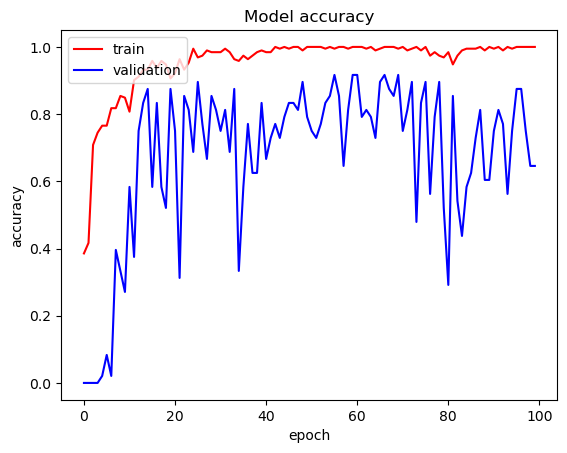

In [35]:
plt.plot(history.history['accuracy'], label='train', color="red")
plt.plot(history.history['val_accuracy'], label='validation', color="blue")
plt.title('Model accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

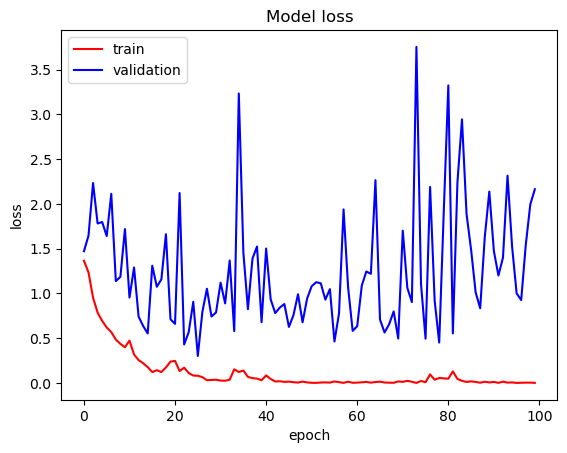

In [36]:
plt.plot(history.history['loss'], label='train', color="red")
plt.plot(history.history['val_loss'], label='validation', color="blue")
plt.title('Model loss')
plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [37]:
score, accuracy = model.evaluate(X_test, y_test)
print('Test score achieved:', score)
print('Test accuracy achieved:', accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8569 - loss: 1.0081
Test score achieved: 1.1944396495819092
Test accuracy achieved: 0.8166666626930237


In [38]:
pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


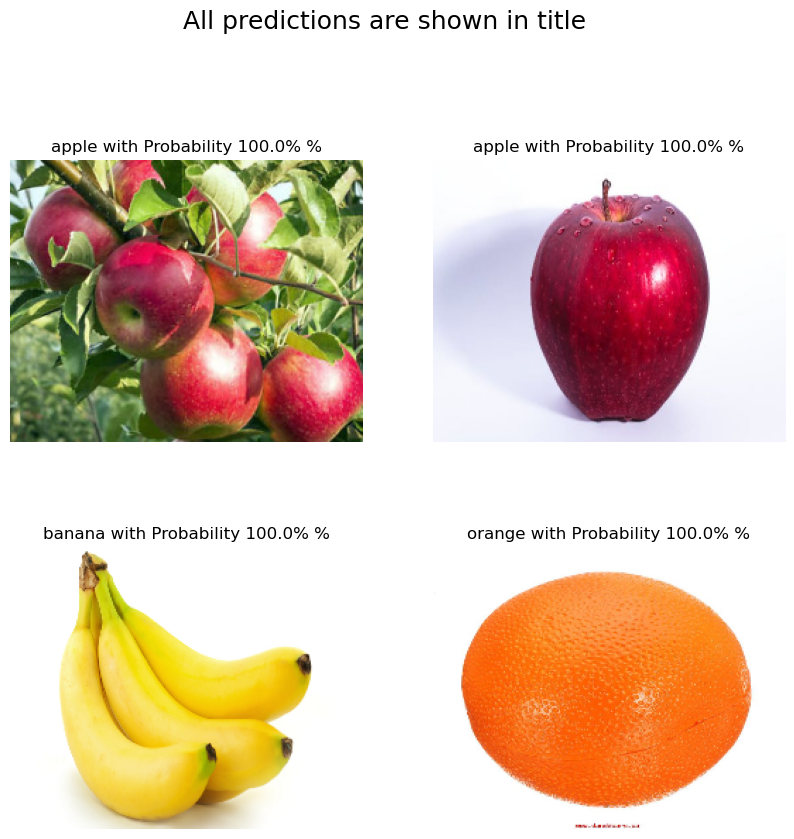

In [48]:
fig, axs= plt.subplots(2,2, figsize=[10,10])
fig.subplots_adjust(hspace=.01)


count=0
for i in range(2):    
    for j in range(2):  
        
        img = cv2.imread(path_test[count])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        img = cv2.resize(img, (250,200))
        result = np.argsort(pred[count])[::-1]
        
        i_max = -1
        max_val = ""
        for (k,val) in enumerate(fruits.keys()):
            
            if(pred[count][k] > i_max):
                i_max = pred[count][k]
                max_val = val
        
        txt = str(max_val) + " with Probability "+ str("{:.4}%".format(i_max*100)) + " %"

        axs[i][j].imshow(img)
        axs[i][j].set_title(txt)
        axs[i][j].axis('off')

        count+=16
        
plt.suptitle("All predictions are shown in title", fontsize = 18)        
plt.show()

In [ ]:
Finish